# Mergers, redshift and magnitudes

In this notebook we use the Galaxy Zoo 2 dataset and investigate the relations between merger fraction, merger vote fraction, redshift and magnitudes

The GZ2 data can be found at https://data.galaxyzoo.org/
<br>
We are using Table 5 in this notebook, which has been merged with the SDSS metadata provided on the GZ2 data page in order to get redshifts and magnitudes for the 243,500 galaxies in our data set.

First we import the necessary packages and import the database into an Astropy Table "gz2_data".

We print the info of the table to get the column names we are interested in.

In [1]:
# from astropy.table import Table
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

# Import gz2 data as a table
filename = "GZ Data\GZ2_main_with_photometry_and_redshift.fits" # Table 5 with SDSS metadata (redshift, photometry)

with fits.open(filename) as data:
    gz2_data = Table(data[1].data)

print(gz2_data.info())

<Table length=243500>
                             name                              dtype  n_bad
------------------------------------------------------------- ------- -----
                                                    specobjid   int64     0
                                                     dr8objid   int64     0
                                                     dr7objid   int64     0
                                                         ra_1 float32     0
                                                        dec_1 float32     0
                                                     rastring   str11     0
                                                    decstring   str11     0
                                                       sample   str20     0
                                                     gz2class   str20     0
                                        total_classifications   int16     0
                                                  total_votes   in

# Mergers and redshift

First we want to know how the entire GZ2 dataset is spread in redshift, $z$, so we plot a histogram of number of galaxies against redshift, using bin sizes of 0.025 for $0\leq z \leq 0.25$.


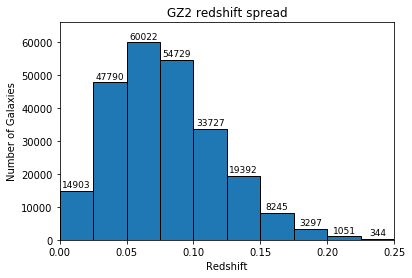

In [18]:
# Bin all galaxies into redshift bins of size 0.025 between 0 and 0.25
all_binned, bin_edges = np.histogram(gz2_data["REDSHIFT"], bins=np.arange(0, 0.275, 0.025))
bin_centres = np.arange(0.0125, 0.2625, 0.025)

# Create a plot of number of gaalxies against redshift
plt.bar(bin_centres, all_binned, width=bin_edges[1]-bin_edges[0], edgecolor="black")
# plt.plot(bin_centres, all_binned) # Line plot
plt.xlim(0, max(bin_edges))
plt.ylim(0, max(all_binned)*1.1)
plt.xlabel("Redshift")
plt.ylabel("Number of Galaxies")
plt.title("GZ2 redshift spread")

# Add numbers ontop of bars, comment out if not needed
for i in range(len(bin_centres)):
    plt.text(bin_centres[i], all_binned[i]+max(all_binned)/60, str(int(all_binned[i])), fontsize=9, ha='center')

#Show plot
plt.show()

The plot has a peak in the $0.05 < z < 0.075$ bin, and most galaxies are within the range $0 \leq z < 0.15$.

Now we want to plot how the merger fraction of galaxies, $f_m$, changes with redshift. To do so, we must choose a threshold of what is classified as a merger.

The GZ2 database has flagged some galaxies as definitely being mergers, denoted by the column "t08_odd_feature_a24_merger_flag" == 1, of which there are 513 in the database. This is a hard threshold to pass, hence the low number of galaxies that have this flag. We will later choose our own threshold, letting more galaxies count as mergers, but this will also increase the rate of false positives if we choose our threshold too low.

First we will plot a graph of merger fraction, $f_m$, against redshift for the 513 galaxies that are flagged as mergers in the GZ2 database.

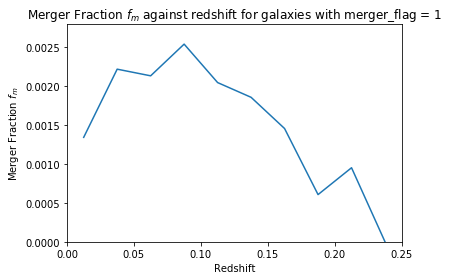

In [25]:
# Bin all galaxies into redshift bins of size 0.025 between 0 and 0.25
all_binned, bin_edges = np.histogram(gz2_data["REDSHIFT"], bins=np.arange(0, 0.275, 0.025))
bin_centres = np.arange(0.0125, 0.2625, 0.025)

# Bin galaxies with merger_flag = 1 into redshift bins
mergers = gz2_data[gz2_data["t08_odd_feature_a24_merger_flag"] == 1]
mergers_binned, bin_edges = np.histogram(mergers["REDSHIFT"], bins=np.arange(0, 0.275, 0.025))

merger_fraction_redshift = mergers_binned / all_binned

plt.plot(bin_centres, merger_fraction_redshift)
plt.xlim(0, max(bin_edges))
plt.ylim(0, max(merger_fraction_redshift)*1.1)
plt.xlabel("Redshift")
plt.ylabel("Merger Fraction $f_m$")
plt.title("Merger Fraction $f_m$ against redshift for galaxies with merger_flag = 1")
plt.show()

The low number of galaxies classified as galaxies here means that the merger fraction $f_m$ is at most $\approx 0.25\%$ for $0.75<z<0.1$. There is a general downward trend as $z$ increases, probably due to higher redshift galaxies appearing smaller and less bright, meaning they are harder for the GZ2 users to unanimously classify them as mergers.
<br>
If classification problems were not an issue, we would expect the number of galaxies that are merging to increase with redshift, as at earlier times the Universe was smaller and galaxy separations were smaller.

To increase the number of mergers in our sample, we will create our own criteria for classification. The most important parameters to consider are the "t06_odd_a14_yes_count" (number of votes for the galaxy having an odd feature), "t06_odd_a14_yes_debiased" (debiased vote fraction for the galaxy having an odd feature), "t08_odd_feature_a24_merger_count" (number of votes for the galaxy being a merger), "t08_odd_feature_a24_merger_debiased" (debiased vote fraction for the galaxy being a merger) columns in the GZ2 database.
<br>
As every user must answer the "anything odd?" question, the number of "odd yes" votes, and the debiased "odd yes" vote fraction likely give similar thresholds if the galaxy has been classified enough times.

We now choose our first set of new criteria:
- "t08_odd_feature_a24_merger_count" $\geq$ 10
-"t08_odd_feature_a24_merger_debiased" > 0.4

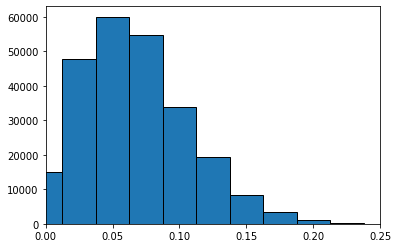

9158
7970


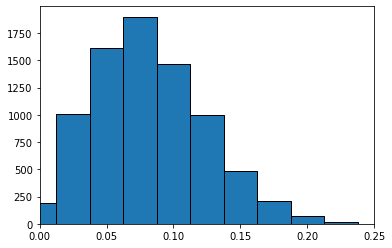

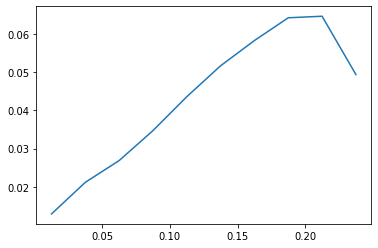

In [26]:
all_binned, bin_edges = np.histogram(gz2_data["REDSHIFT"], bins=np.arange(0, 0.275, 0.025))
# print(all_all_binned)
plt.bar(bin_edges[:-1], all_binned, width = bin_edges[1]-bin_edges[0], edgecolor="black")
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()   

mergers = gz2_data[gz2_data["t08_odd_feature_a24_merger_count"] >= 10]
print(len(mergers))
mergers = mergers[mergers["t08_odd_feature_a24_merger_debiased"] > 0.4]
print(len(mergers))
mergers_binned, bin_edges = np.histogram(mergers["REDSHIFT"], bins=np.arange(0, 0.275, 0.025))
# print(mergers_binned)
plt.bar(bin_edges[:-1], mergers_binned, width = bin_edges[1]-bin_edges[0], edgecolor="black")
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()  

merger_fraction_redshift = mergers_binned / all_binned

plt.plot(np.arange(0.0125, 0.2625, 0.025), merger_fraction_redshift)
plt.show()